<a href="https://colab.research.google.com/github/BEKKAMSHIVA/-Bank-Customer-Churn-Prediction-Using-Deep-Learning-TensorFlow-Keras-ANN-/blob/main/CUSTOMER_CHURNK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("barelydedicated/bank-customer-churn-modeling")

print("Path to dataset files:", path)

100%|██████████| 262k/262k [00:00<00:00, 538kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/barelydedicated/bank-customer-churn-modeling/versions/1


In [3]:
import pandas as pd
bank_df=pd.read_csv("Churn_Modelling.csv")

In [4]:
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
bank_df.shape

(10000, 14)

In [6]:
bank_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

#REMOVE THE UNWANTED COLUMNS:


In [7]:
bank_df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [8]:
bank_df.shape

(10000, 11)

In [9]:
bank_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#CHECKING FOR NULL VALUES

In [10]:
bank_df.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [11]:
bank_df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


#CONVERTING CATEGORIAL COLUMN INTO NUMERICAL COLUMNS:

In [12]:
bank_df.Gender.unique()   #Label Encoding

array(['Female', 'Male'], dtype=object)

In [13]:
bank_df.replace({'Female':1,'Male':0},inplace=True)

<ipython-input-13-9d61d81db81e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_df.replace({'Female':1,'Male':0},inplace=True)


In [14]:
bank_df.Gender.unique()

array([1, 0])

In [15]:
bank_df.Geography.unique() #One-hat Encoding

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
bank_df=(pd.get_dummies(data=bank_df,columns=['Geography'])).astype(int)


In [17]:
bank_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0,1,1,1,101348,1,1,0,0
1,608,1,41,1,83807,1,0,1,112542,0,0,0,1
2,502,1,42,8,159660,3,1,0,113931,1,1,0,0
3,699,1,39,1,0,2,0,0,93826,0,1,0,0
4,850,1,43,2,125510,1,1,1,79084,0,0,0,1


In [18]:
bank_df.shape

(10000, 13)

In [19]:
bank_df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [20]:
bank_df.dtypes

,0
CreditScore,int64
Gender,int64
Age,int64
Tenure,int64
Balance,int64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,int64
Exited,int64


In [21]:
#Now we will split the data frame
X=bank_df.drop(columns=['Exited'])
y=bank_df['Exited']

In [22]:
X.shape

(10000, 12)

In [23]:
X.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [24]:
#data normalization
#
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X[:]=scaler.fit_transform(X)

<ipython-input-24-ab0a7ba1fdb2>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.538 0.516 0.304 ... 0.718 0.844 0.884]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X[:]=scaler.fit_transform(X)
<ipython-input-24-ab0a7ba1fdb2>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.32432432 0.31081081 0.32432432 ... 0.24324324 0.32432432 0.13513514]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X[:]=scaler.fit_transform(X)
<ipython-input-24-ab0a7ba1fdb2>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.2 0.1 0.8 ... 0.7 0.3 0.4]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X[:]=scaler.fit_transform(X)
<ipython-input-24-ab0a7ba1fdb2>:5: Futur

In [25]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506733,1,0,0
1,0.516,1,0.310811,0.1,0.334028,0.000000,0,1,0.562708,0,0,1
2,0.304,1,0.324324,0.8,0.636354,0.666667,1,0,0.569654,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1,0,0
4,1.000,1,0.337838,0.2,0.500243,0.000000,1,1,0.395403,0,0,1


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
X_train.shape,X_test.shape

((8000, 12), (2000, 12))

In [28]:
#BUILDING THE MODEL
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
        keras.layers.Dense(1, input_shape=(12,), activation='sigmoid')  # single_layer (or) output_layer , input_features are 12
])


model.compile(optimizer='adam',   #adam iptimizer
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2022 - loss: 1.2047
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5111 - loss: 0.6963
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7847 - loss: 0.5584
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7948 - loss: 0.5165
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7931 - loss: 0.5053
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7942 - loss: 0.4948
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7953 - loss: 0.4898
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8015 - loss: 0.4749
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7927 - loss: 0.4810
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7967 - loss: 0.4758
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7911 - loss: 0.4770
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [29]:
loss,accuracy=model.evaluate(X_test,y_test)     #accuracy 81.69
accuracy*100

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8070 - loss: 0.4254


81.69999718666077

In [30]:

#BUILDING THE MODEL
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
        keras.layers.Dense(15, input_shape=(12,), activation='relu'),#hidden layer 1
        keras.layers.Dense(10, activation='relu'),#hidden layer 2
        keras.layers.Dense(5, activation='relu'),#hidden layer 3
        keras.layers.Dense(1, activation='sigmoid')
])


#IF WE INCREASE THE HIDDEN LAYERS IT LEAD TO A OVERFIT THE MODEL.

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100 ,batch_size= 50)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7950 - loss: 0.5447
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8007 - loss: 0.4735
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7972 - loss: 0.4628
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7917 - loss: 0.4540
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7904 - loss: 0.4487
Epoch 6/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7997 - loss: 0.4366
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8118 - loss: 0.4307
Epoch 8/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8266 - loss: 0.4163
Epoch 9/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8222 - loss: 0.4289
Epoch 10/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8186 - loss: 0.4176
Epoch 11/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8268 - loss: 0.4113
Epoch 12/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [31]:
loss,accuracy=model.evaluate(X_test,y_test)   #ACCURACY HAS INCREASED AND LOSS IS DECREASED BY ADDING SOME HIDDEN LAYERS
accuracy*100                                  #ACCURACY 86.50

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8645 - loss: 0.3383


86.50000095367432

In [32]:
y_test[10:15]

,Exited
2750,1
7487,1
5272,1
5653,0
3999,0


In [33]:
pred=model.predict(X_test)
binary_pred=(pred>0.5).astype(int)
binary_pred[10:15]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[1],
       [1],
       [1],
       [0],
       [0]])

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,binary_pred))


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



In [35]:
bank_df.Exited.value_counts()  #F1-score should ideally be high for both classes, indicating that both precision and recall are balanced.
                               #Class 0 has a high F1-score (0.92), meaning the model performs well on class 0.
                                 #Class 1 has a low F1-score (0.61), suggesting that the model is not performing as well on class 1, especially in terms of recall.

,count
Exited,
0,7963
1,2037


In [36]:
# THE NUMBER OF CLASS FOR '0' IS MORE WHEN COMPARED TO '1' SO, DATA IS IMBALANCED.
# BY USING THE OVER SAMPLING WE CAN INCREASE THE MINORITY CLASS.
# IN OVER SAMPLING WE ARE USING THE SMOTE TECHNIQUE.

In [37]:
#SMOOTH
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X,y=smote.fit_resample(X,y)

In [38]:
X.shape    #previously we have 10000 rows now we have 15926 rows.

(15926, 12)

In [39]:
y.value_counts()   #NOW BOTH THE CLASSES ARE MATCHED.

,count
Exited,
1,7963
0,7963


In [40]:
#NOW WE WILL REPEATED THE PROCESS FORME SCALLING ON WORDS...
#data normalization

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X[:]=scaler.fit_transform(X)

In [41]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506733,1,0,0
1,0.516,1,0.310811,0.1,0.334028,0.000000,0,1,0.562708,0,0,1
2,0.304,1,0.324324,0.8,0.636354,0.666667,1,0,0.569654,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1,0,0
4,1.000,1,0.337838,0.2,0.500243,0.000000,1,1,0.395403,0,0,1


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
X_train.shape,X_test.shape

((12740, 12), (3186, 12))

In [44]:
#BUILDING THE MODEL
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
        keras.layers.Dense(1, input_shape=(12,), activation='sigmoid')  # 1 hidden_layer , input_features are 12
])


model.compile(optimizer='adam',   #adam iptimizer
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5020 - loss: 0.7471
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5694 - loss: 0.6801
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6135 - loss: 0.6600
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6317 - loss: 0.6458
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6594 - loss: 0.6331
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6657 - loss: 0.6274
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6645 - loss: 0.6222
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6713 - loss: 0.6162
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6797 - loss: 0.6103
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6821 - loss: 0.6090
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6824 - loss: 0.6089
Epoch 12/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [45]:
loss,accuracy=model.evaluate(X_test,y_test)
                                                #Accuray present 71.18
accuracy*100

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7114 - loss: 0.5671


71.18644118309021

In [46]:

#BUILDING THE MODEL
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
        keras.layers.Dense(15, input_shape=(12,), activation='relu'),#hidden layer 1
        keras.layers.Dense(10, activation='relu'),#hidden layer 2
        keras.layers.Dense(5, activation='relu'),#hidden layer 3
        keras.layers.Dense(1, activation='sigmoid')
])


#IF WE INCREASE THE HIDDEN LAYERS IT LEAD TO A OVERFIT THE MODEL.

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100 ,batch_size= 50)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6217 - loss: 0.6658
Epoch 2/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6705 - loss: 0.6113
Epoch 3/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7009 - loss: 0.5780
Epoch 4/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7171 - loss: 0.5573
Epoch 5/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7420 - loss: 0.5373
Epoch 6/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7458 - loss: 0.5258
Epoch 7/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7575 - loss: 0.5031
Epoch 8/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7595 - loss: 0.4942
Epoch 9/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7692 - loss: 0.4814
Epoch 10/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7673 - loss: 0.4825
Epoch 11/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7677 - loss: 0.4801
Epoch 12/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [47]:
loss,accuracy=model.evaluate(X_test,y_test)  #ACCURARY HAS INCREASED TO 80.41
accuracy*100

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8070 - loss: 0.4160


80.41431307792664

In [48]:
y_test[10:15]

,Exited
2323,0
8663,0
2099,0
12267,1
4995,0


In [49]:
pred=model.predict(X_test)
binary_pred=(pred>0.5).astype(int)
binary_pred[10:15]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1],
       [1],
       [0],
       [1],
       [0]])

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,binary_pred))      #NOW THEIR IS NO MUCH DIFFERENCE IN THE CLASSES OF F1-SCORE.

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1633
           1       0.79      0.82      0.80      1553

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,binary_pred,normalize='true')

array([[0.78934476, 0.21065524],
       [0.1802962 , 0.8197038 ]])

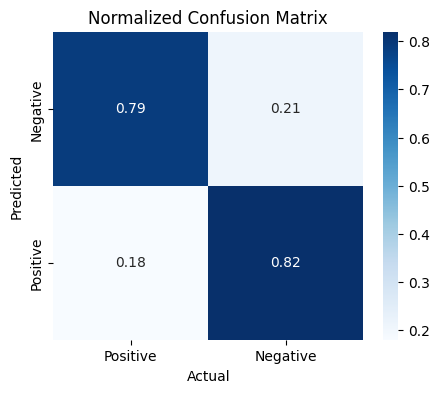

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, binary_pred, normalize='true')

# Plot the heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=['Positive','Negative'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()
